**Task 2 : Stock Market Prediction And Forecasting Using Stacked LSTM**

LetsGrowMore

Name : Vaishnavi Chandrakant Tatkare

In [4]:
# importing library
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
%matplotlib inline


In [5]:
#data collection
df = pd.read_csv('/content/SM.csv')
#data reading
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [6]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [7]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [8]:
df.shape

(2035, 8)

In [9]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [11]:
df.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

**Data Cleaning and Preprocessing**


In [12]:
#checking null values
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [13]:
#duplicate value
df.duplicated().sum()

0

**Statistical Description of the Data**

In [14]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


<ipython-input-15-6b36363f3231>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

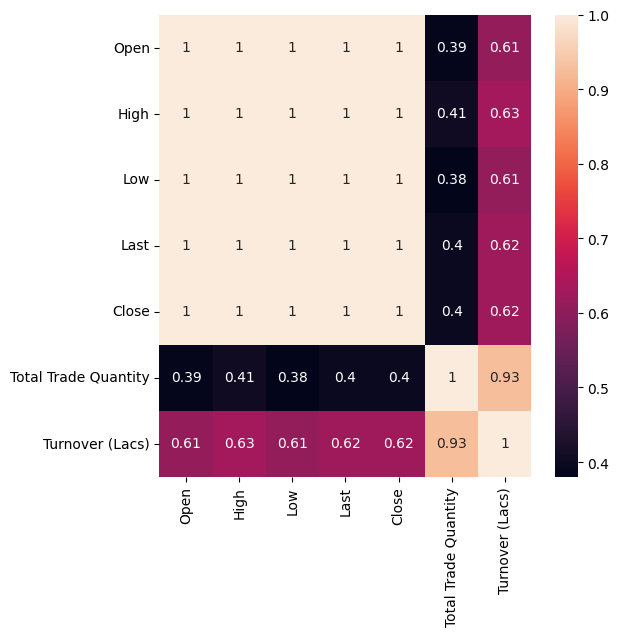

In [15]:
plt.figure(figsize = (6,6))
sns.heatmap(df.corr(), annot = True)

<ipython-input-16-569c119e756d>:2: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.cov(), annot = True)


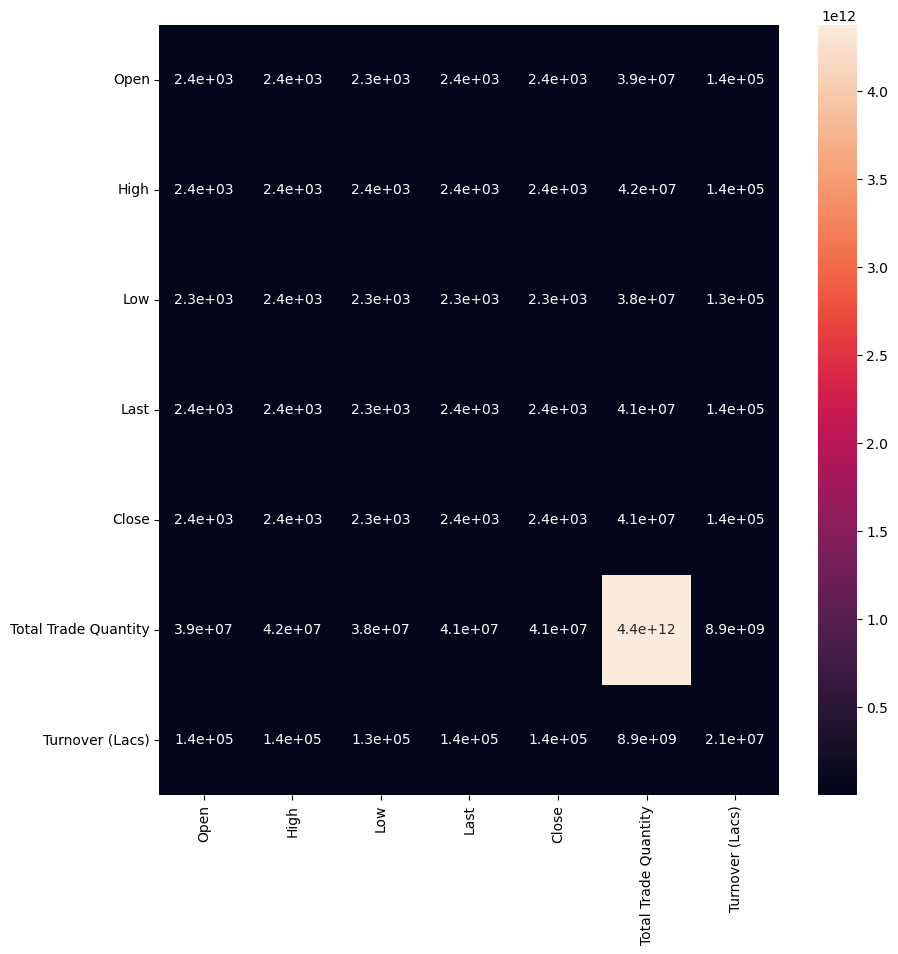

In [16]:
plt.figure(figsize = (10,10))
sns.heatmap(df.cov(), annot = True)
plt.show()

**Data Visualisation**

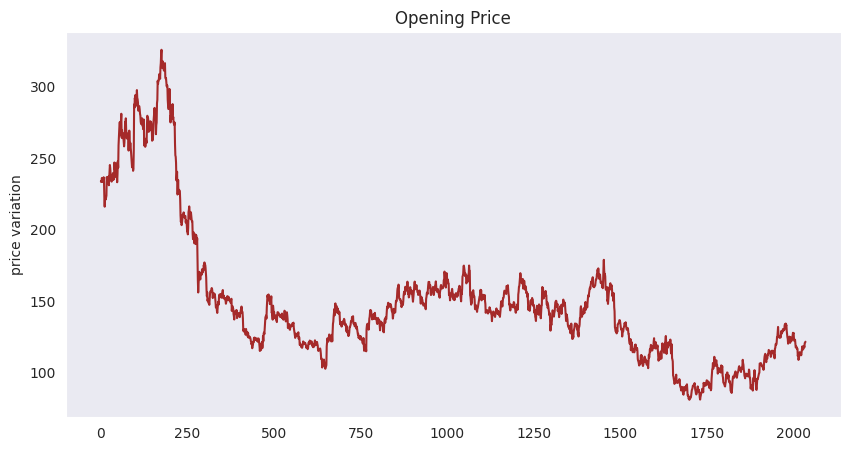

In [17]:
sns.set_style('dark')
plt.figure(figsize = (10,5))
plt.plot(df.Close, color = 'brown')
plt.ylabel('price variation')
plt.title("Opening Price")
plt.show()


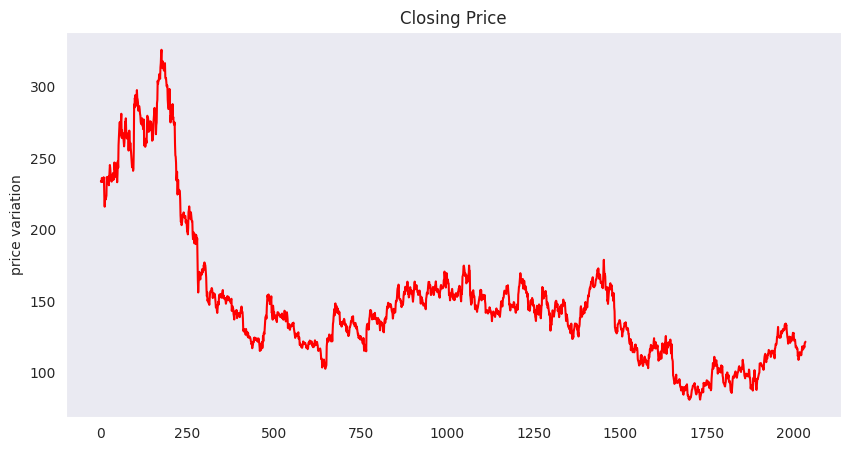

In [18]:
sns.set_style('dark')
plt.figure(figsize = (10,5))
plt.plot(df.Close, color = 'r')
plt.ylabel('price variation')
plt.title("Closing Price")
plt.show()

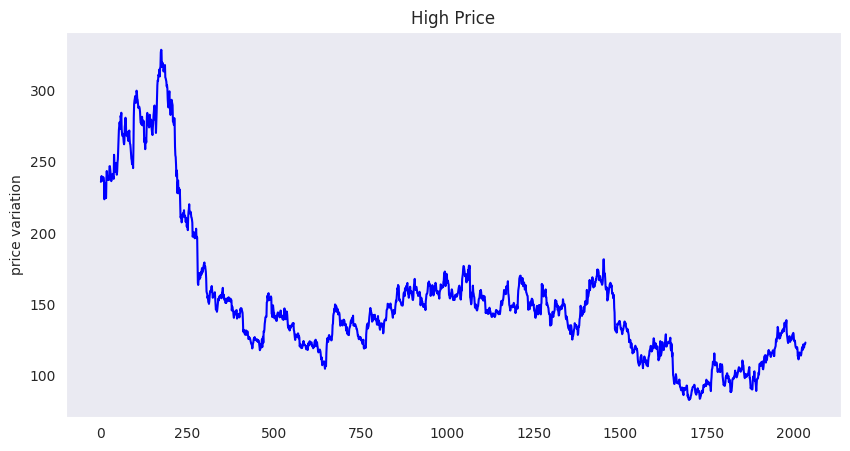

In [19]:
sns.set_style('dark')
plt.figure(figsize = (10,5))
plt.plot(df.High, color = 'b')
plt.ylabel('price variation')
plt.title("High Price")
plt.show()

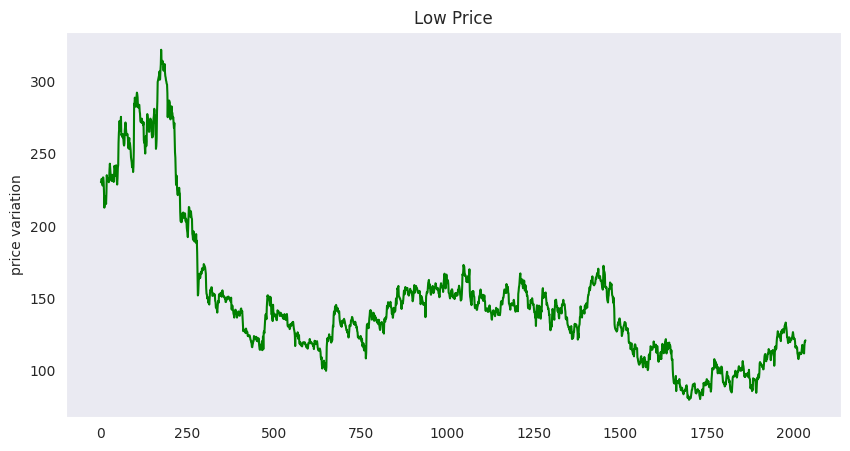

In [20]:
sns.set_style('dark')
plt.figure(figsize = (10,5))
plt.plot(df.Low, color = 'g')
plt.ylabel('price variation')
plt.title("Low Price")
plt.show()


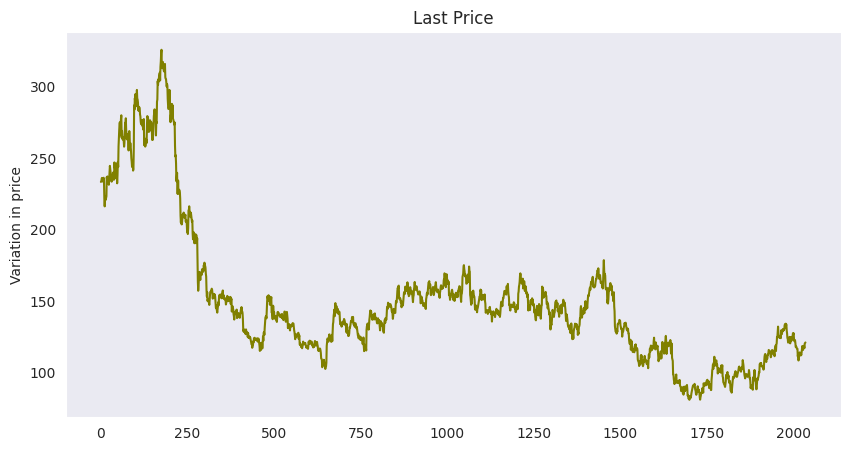

In [21]:
sns.set_style('dark')
plt.figure(figsize = (10,5))
plt.plot(df.Last, color = 'olive')
plt.ylabel('Variation in price')
plt.title("Last Price")
plt.show()


In [22]:
df.Date = pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index = df['Date']
df.drop('Date', axis = 1,inplace = True)
df

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...
2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31


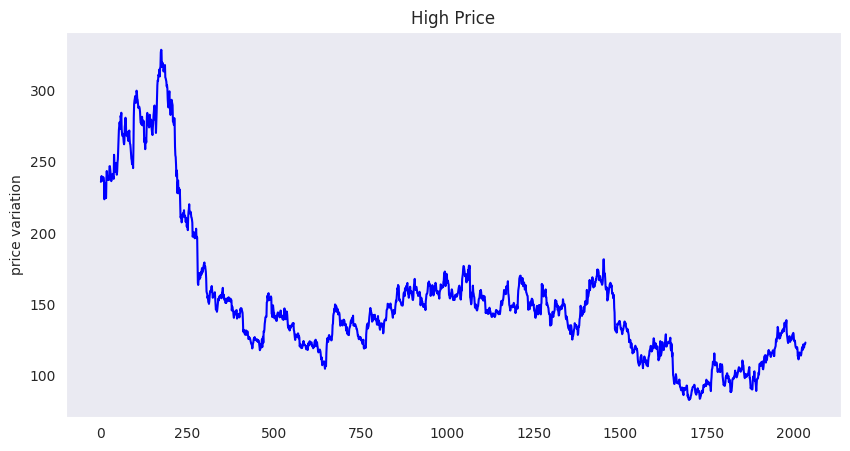

In [23]:
#Building the model
data_high=df.reset_index()['High']

sns.set_style('dark')
plt.figure(figsize = (10,5))
plt.plot(data_high, color = 'b')
plt.ylabel('price variation')
plt.title("High Price")
plt.show()

In [24]:
#Scaling
scaler = MinMaxScaler(feature_range = (0,1))
data_high = scaler.fit_transform(np.array(data_high).reshape(-1,1))

In [25]:
data_high.shape

(2035, 1)

In [26]:
data_high

array([[0.62268754],
       [0.62614353],
       [0.6391543 ],
       ...,
       [0.15917869],
       [0.15938199],
       [0.16344786]])

In [27]:
#Splitting the data into train and test sets
training_size = int(len(data_high) * 0.75)
test_size = len(data_high) - training_size
train_data, test_data = data_high[0:training_size,:], data_high[training_size:len(data_high),:1]

training_size,test_size

(1526, 509)

In [28]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 100
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)


In [29]:
#Reshaping the input

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print("The shape of X_train is : ", X_train.shape), print("The shape of Y_train is : ", Y_train.shape)

The shape of X_train is :  (1425, 100, 1)
The shape of Y_train is :  (1425,)


(None, None)

In [30]:
print("The shape of X_test is : ", X_test.shape), print("The shape of Y_test is : ", Y_test.shape)

The shape of X_test is :  (408, 100, 1)
The shape of Y_test is :  (408,)


(None, None)

**Creating the LSTM Model**

In [31]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
23/23 [==============================] - 22s 556ms/step - loss: 0.0235 - val_loss: 0.0078
Epoch 2/100
23/23 [==============================] - 17s 751ms/step - loss: 0.0027 - val_loss: 6.9450e-04
Epoch 3/100
23/23 [==============================] - 11s 476ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 4/100
23/23 [==============================] - 11s 469ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 5/100
23/23 [==============================] - 9s 403ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 6/100
23/23 [==============================] - 11s 463ms/step - loss: 0.0012 - val_loss: 8.6011e-04
Epoch 7/100
23/23 [==============================] - 11s 471ms/step - loss: 0.0011 - val_loss: 8.8546e-04
Epoch 8/100
23/23 [==============================] - 11s 465ms/step - loss: 9.9888e-04 - val_loss: 8.5100e-04
Epoch 9/100
23/23 [==============================] - 11s 468ms/step - loss: 9.6875e-04 - val_loss: 0.0011
Epoch 10/100
23/23 [==============================] - 9s 40

**Making predictions**

In [34]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [35]:
#Transforming to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

**Model Evaluation**

In [36]:
#Calculating RMSE performance metrics

math.sqrt(mean_squared_error(Y_train, train_predict))

167.65454234481822

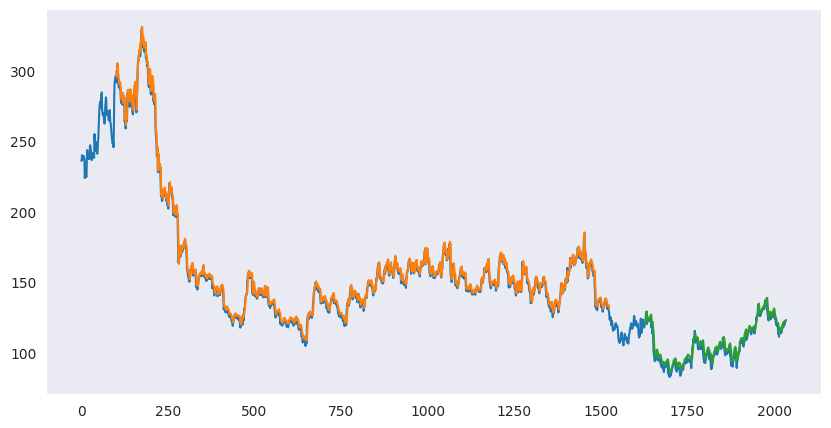

In [37]:
#Plotting the results
#Shift train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(data_high)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

#Shift test prediction for plotting
testPredictPlot = np.empty_like(data_high)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(data_high) - 1, :] = test_predict

#Plot baseline and predictions
plt.figure(figsize=(10,5))
plt.plot(scaler.inverse_transform(data_high))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [46]:
len(test_data)

509

In [38]:
#predictions for next 30 days

len(test_data), X_test.shape

(509, (408, 100, 1))

In [39]:
X_input = test_data[409:].reshape(1,-1)
X_input.shape


(1, 100)

In [40]:
temp_input = list(X_input)
temp_input = temp_input[0].tolist()

In [47]:
temp_input

[0.13458019922748526,
 0.1325472657044115,
 0.13397031917056312,
 0.13356373246594838,
 0.1349867859321,
 0.1410855865013214,
 0.1349867859321,
 0.1264484651351901,
 0.12685505183980483,
 0.12482211831673101,
 0.145151453547469,
 0.14677780036592802,
 0.15003049400284613,
 0.15368977434437892,
 0.17198617605204308,
 0.165480788778207,
 0.17625533645049812,
 0.17564545639357593,
 0.19129904452124408,
 0.20817239276275662,
 0.2030900589550722,
 0.18479365724740798,
 0.17930473673510877,
 0.1896726977027851,
 0.17483228298434644,
 0.1784915633258793,
 0.1764586298028054,
 0.18540353730433018,
 0.1837771904858711,
 0.19190892457816627,
 0.1898759910550925,
 0.1902825777597072,
 0.19394185810124004,
 0.20004065867046145,
 0.1963813783289286,
 0.19495832486277692,
 0.2034966456596869,
 0.19597479162431392,
 0.21162837975198207,
 0.22036999390119943,
 0.2097987395812157,
 0.2152876600935149,
 0.2158975401504371,
 0.2161008335027444,
 0.22748526123195772,
 0.1915023378735516,
 0.18337060378125

In [57]:
Thirty_days_output=[]
i=0

while(i<30):
    if(len(temp_input)>100):
        temp_input = temp_input[1:]
        preds_input=np.array(temp_input) ###latest 100 data
        preds_input=preds_input.reshape(1,-1)



    x_input = x_input.reshape((1, time_step,1))
    day_output = model.predict(x_input, verbose=0)
    temp_input.extend(day_output[0].tolist())
    Thirty_days_output.extend(day_output.tolist())

    #print(f"Day-{i+1} input:\n\n{preds_input}\n\n")
    #print(f"Day-{i+1} output:\n\n{day_output}\n\n")
    i=i+1
print(Thirty_days_output)

[[0.1678558886051178], [0.1678558886051178], [0.1678558886051178], [0.1678558886051178], [0.1678558886051178], [0.1678558886051178], [0.1678558886051178], [0.1678558886051178], [0.1678558886051178], [0.1678558886051178], [0.1678558886051178], [0.1678558886051178], [0.1678558886051178], [0.1678558886051178], [0.1678558886051178], [0.1678558886051178], [0.1678558886051178], [0.1678558886051178], [0.1678558886051178], [0.1678558886051178], [0.1678558886051178], [0.1678558886051178], [0.1678558886051178], [0.1678558886051178], [0.1678558886051178], [0.1678558886051178], [0.1678558886051178], [0.1678558886051178], [0.1678558886051178], [0.1678558886051178]]


In [58]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [59]:
day_new.shape

(100,)

In [60]:
day_pred.shape

(30,)

In [64]:
data_new = data_high.tolist()
data_new.extend(Thirty_days_output)

In [62]:
len(data_high)

2035

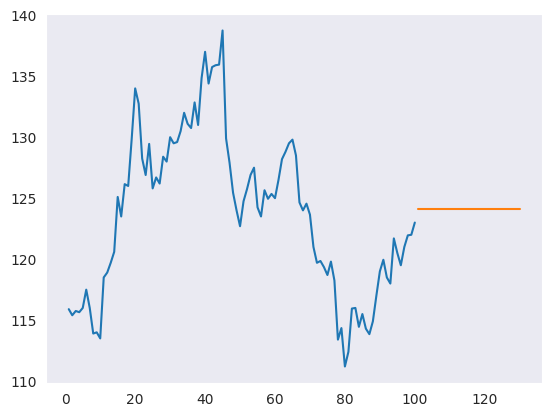

In [65]:
plt.plot(day_new, scaler.inverse_transform(data_high[1935:]))
plt.plot(day_pred, scaler.inverse_transform(Thirty_days_output))

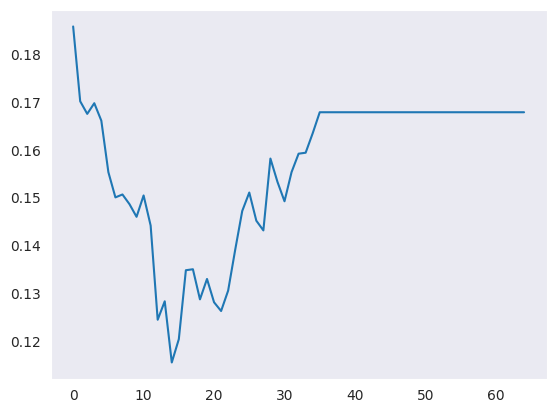

In [66]:
data_new = data_high.tolist()
data_new.extend(Thirty_days_output)
plt.plot(data_new[2000:])

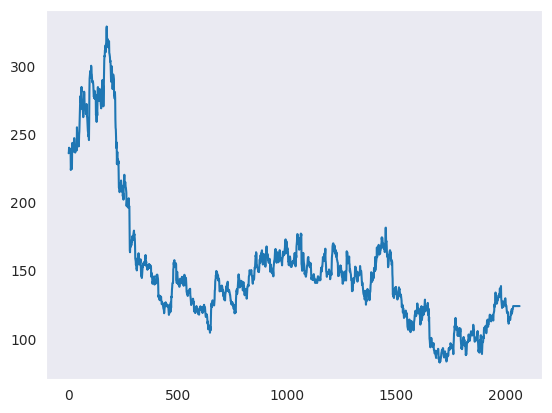

In [68]:
data_new = scaler.inverse_transform(data_new).tolist()

plt.plot(data_new)
